In [12]:
import keras

In [13]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

In [14]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [15]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = "C:/Users/yang/Desktop/nongzuowu/small/"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir,'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size] = features_batch
        labels[i*batch_size:(i+1)*batch_size] = labels_batch
        i+=1
        if i * batch_size>=sample_count:
            break
    return features, labels

In [16]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
train_features=np.reshape(train_features, (2000, 4*4*512))
validation_features=np.reshape(validation_features, (1000, 4*4*512))
test_features=np.reshape(test_features, (1000, 4*4*512))

In [18]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc']) 

history = model.fit(train_features, train_labels, epochs=100, batch_size=20, validation_data=(validation_features, validation_labels))

Epoch 1/100
100/100 [==============================] - 1s 9ms/step - loss: 0.6743 - acc: 0.5985 - val_loss: 0.5466 - val_acc: 0.7690
Epoch 2/100
100/100 [==============================] - 1s 9ms/step - loss: 0.5105 - acc: 0.7505 - val_loss: 0.4825 - val_acc: 0.7860
Epoch 3/100
100/100 [==============================] - 1s 9ms/step - loss: 0.4286 - acc: 0.8090 - val_loss: 0.4501 - val_acc: 0.7920
Epoch 4/100
100/100 [==============================] - 1s 8ms/step - loss: 0.4105 - acc: 0.8180 - val_loss: 0.4368 - val_acc: 0.8080
Epoch 5/100
100/100 [==============================] - 1s 9ms/step - loss: 0.3845 - acc: 0.8390 - val_loss: 0.4248 - val_acc: 0.8120
Epoch 6/100
100/100 [==============================] - 1s 9ms/step - loss: 0.3534 - acc: 0.8450 - val_loss: 0.4122 - val_acc: 0.8080
Epoch 7/100
100/100 [==============================] - 1s 9ms/step - loss: 0.3455 - acc: 0.8485 - val_loss: 0.4017 - val_acc: 0.8170
Epoch 8/100
100/100 [==============================] - 1s 8ms/step - 

Epoch 62/100
100/100 [==============================] - 1s 9ms/step - loss: 0.0705 - acc: 0.9860 - val_loss: 0.3637 - val_acc: 0.8480
Epoch 63/100
100/100 [==============================] - 1s 8ms/step - loss: 0.0679 - acc: 0.9850 - val_loss: 0.3693 - val_acc: 0.8480
Epoch 64/100
100/100 [==============================] - 1s 8ms/step - loss: 0.0683 - acc: 0.9845 - val_loss: 0.3674 - val_acc: 0.8460
Epoch 65/100
100/100 [==============================] - 1s 9ms/step - loss: 0.0649 - acc: 0.9855 - val_loss: 0.3654 - val_acc: 0.8510
Epoch 66/100
100/100 [==============================] - 1s 8ms/step - loss: 0.0649 - acc: 0.9830 - val_loss: 0.3674 - val_acc: 0.8490
Epoch 67/100
100/100 [==============================] - 1s 8ms/step - loss: 0.0641 - acc: 0.9845 - val_loss: 0.3836 - val_acc: 0.8460
Epoch 68/100
100/100 [==============================] - 1s 8ms/step - loss: 0.0637 - acc: 0.9870 - val_loss: 0.3775 - val_acc: 0.8440
Epoch 69/100
100/100 [==============================] - 1s 8ms

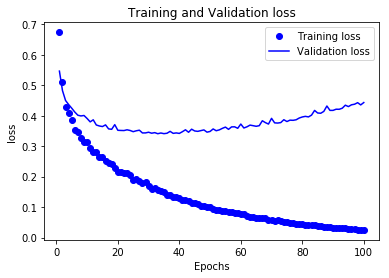

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']  # 训练资料的正确性
val_acc = history.history['val_acc']  # val 测试资料的正确性
loss = history.history['loss']  # 训练资料的损失值
val_loss = history.history['val_loss']  # val 测试资料的损失值

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

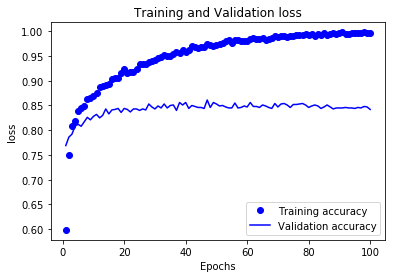

In [20]:
plt.clf()

plt.plot(epochs,acc , 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
